# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    
    colors = {1:"red", 2:"blue", 4:"green"}
    w, h, c = batch["image"].shape
    
    #fig, ax = plt.subplots(figsize = (5,5))
    fig, ax = plt.subplots()
    ax.imshow(batch["image"].numpy().astype("uint8"))
    
    class_labels = batch["groundtruth_classes"].numpy()
    
    for i in range(len(batch["groundtruth_boxes"])):
        ymin, xmin, ymax, xmax = batch["groundtruth_boxes"][i]
        rect = patches.Rectangle((xmin * w, ymin * h), (xmax - xmin) * w, (ymax - ymin) * h, edgecolor=colors[class_labels[i]], facecolor="none")
        ax.add_patch(rect)
        
    plt.show()
        

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

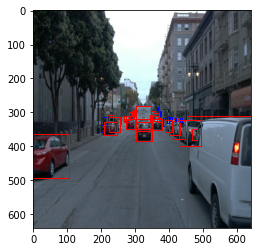

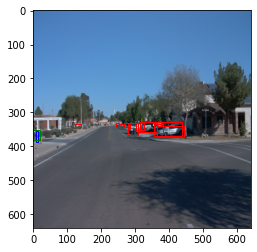

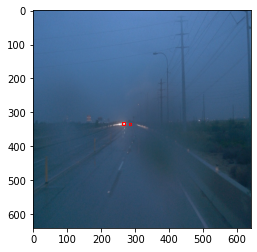

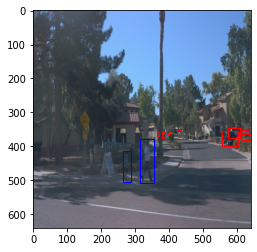

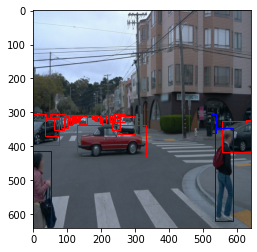

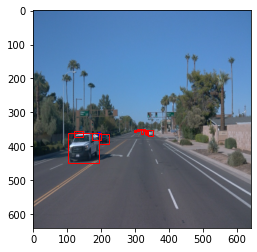

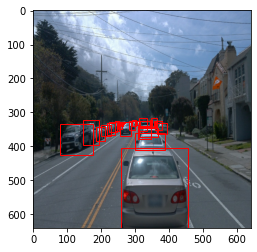

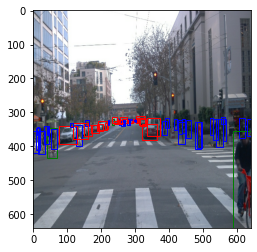

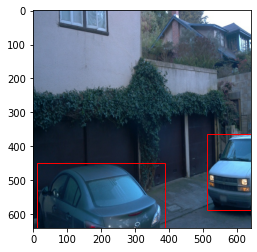

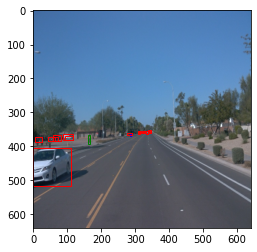

In [4]:
def display_instances():
    for frame in dataset.take(10):
        display_images(frame)
        
display_instances()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [62]:
#%cd /home/workspace/experiments/pretrained_model/
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
#!tar -xvzf *.gz

--2023-02-05 19:30:32--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.152.128, 2607:f8b0:4001:c56::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.152.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   209MB/s    in 1.1s    

2023-02-05 19:30:33 (209 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resne

In [67]:
#!ls /home/workspace/experiments/pretrained_model/

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8


In [17]:
%cd /home/workspace
!ls

/home/workspace
Exploratory Data Analysis-Copy1.ipynb  __pycache__     inference_video.py
Exploratory Data Analysis.ipynb        data	       label_map.pbtxt
Explore augmentations.ipynb	       edit_config.py  launch_jupyter.sh
LICENSE.md			       experiments     pipeline.config
README.md			       filenames.txt   utils.py


In [18]:
!python edit_config.py --train_dir /home/workspace/data/train/ --eval_dir /home/workspace/data/val/ --batch_size 2 --checkpoint /home/workspace/experiments/pretrained_model/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0 --label_map /home/workspace/experiments/label_map.pbtxt

2023-02-05 20:47:40.904527: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [21]:
!python experiments/model_main_tf2.py --model_dir=experiments/reference --pipeline_config_path=experiments/reference/pipeline_new.config

2023-02-05 21:01:48.044123: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2023-02-05 21:01:51.285317: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2023-02-05 21:01:51.292625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 21:01:51.293146: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-02-05 21:01:51.293233: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2023-02-05 21:01:51.295423: I tensorflow/stream_executor/platform/defa

INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord']
I

2023-02-05 21:02:45.507665: W tensorflow/core/common_runtime/bfc_allocator.cc:246] Allocator (GPU_0_bfc) ran out of memory trying to allocate 128.50MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-02-05 21:02:45.507762: W tensorflow/core/common_runtime/bfc_allocator.cc:246] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.10GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-02-05 21:02:45.542074: W tensorflow/core/common_runtime/bfc_allocator.cc:246] Allocator (GPU_0_bfc) ran out of memory trying to allocate 466.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-02-05 21:02:45.556633: W tensorflow/core/common_runtime/bfc_allocator.cc:246] A

2023-02-05 21:03:05.577726: W tensorflow/core/common_runtime/bfc_allocator.cc:431] Allocator (GPU_0_bfc) ran out of memory trying to allocate 19.51MiB (rounded to 20460032)requested by op Loss/Compare_1/IOU/Intersection/Minimum
Current allocation summary follows.
2023-02-05 21:03:05.577817: I tensorflow/core/common_runtime/bfc_allocator.cc:970] BFCAllocator dump for GPU_0_bfc
2023-02-05 21:03:05.577855: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (256): 	Total Chunks: 78, Chunks in use: 78. 19.5KiB allocated for chunks. 19.5KiB in use in bin. 8.2KiB client-requested in use in bin.
2023-02-05 21:03:05.577900: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (512): 	Total Chunks: 45, Chunks in use: 44. 23.0KiB allocated for chunks. 22.5KiB in use in bin. 20.6KiB client-requested in use in bin.
2023-02-05 21:03:05.577942: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (1024): 	Total Chunks: 251, Chunks in use: 250. 254.2KiB allocated for chunks. 253.2K

2023-02-05 21:03:15.591295: W tensorflow/core/common_runtime/bfc_allocator.cc:431] Allocator (GPU_0_bfc) ran out of memory trying to allocate 19.51MiB (rounded to 20460032)requested by op Loss/Compare/IOU/Intersection/Minimum_1
Current allocation summary follows.
2023-02-05 21:03:15.591394: I tensorflow/core/common_runtime/bfc_allocator.cc:970] BFCAllocator dump for GPU_0_bfc
2023-02-05 21:03:15.591413: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (256): 	Total Chunks: 78, Chunks in use: 78. 19.5KiB allocated for chunks. 19.5KiB in use in bin. 8.2KiB client-requested in use in bin.
2023-02-05 21:03:15.591426: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (512): 	Total Chunks: 44, Chunks in use: 43. 22.5KiB allocated for chunks. 22.0KiB in use in bin. 20.2KiB client-requested in use in bin.
2023-02-05 21:03:15.591474: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (1024): 	Total Chunks: 251, Chunks in use: 250. 254.2KiB allocated for chunks. 253.2K

2023-02-05 21:03:15.599360: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704855700 of size 4096 next 232
2023-02-05 21:03:15.599387: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704856700 of size 4096 next 233
2023-02-05 21:03:15.599410: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704857700 of size 4096 next 234
2023-02-05 21:03:15.599430: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704858700 of size 1024 next 235
2023-02-05 21:03:15.599450: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704858b00 of size 1024 next 236
2023-02-05 21:03:15.599466: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704858f00 of size 1024 next 237
2023-02-05 21:03:15.599481: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704859300 of size 1024 next 238
2023-02-05 21:03:15.599496: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704859700 of size 1024 next 241


2023-02-05 21:03:25.610381: W tensorflow/core/common_runtime/bfc_allocator.cc:431] Allocator (GPU_0_bfc) ran out of memory trying to allocate 19.51MiB (rounded to 20460032)requested by op Loss/Compare_1/IOU/Intersection/Minimum_1
Current allocation summary follows.
2023-02-05 21:03:25.610470: I tensorflow/core/common_runtime/bfc_allocator.cc:970] BFCAllocator dump for GPU_0_bfc
2023-02-05 21:03:25.610506: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (256): 	Total Chunks: 78, Chunks in use: 78. 19.5KiB allocated for chunks. 19.5KiB in use in bin. 8.2KiB client-requested in use in bin.
2023-02-05 21:03:25.610532: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (512): 	Total Chunks: 43, Chunks in use: 42. 22.0KiB allocated for chunks. 21.5KiB in use in bin. 19.9KiB client-requested in use in bin.
2023-02-05 21:03:25.610560: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (1024): 	Total Chunks: 251, Chunks in use: 250. 254.2KiB allocated for chunks. 253.

2023-02-05 21:03:35.623677: W tensorflow/core/common_runtime/bfc_allocator.cc:431] Allocator (GPU_0_bfc) ran out of memory trying to allocate 12.50MiB (rounded to 13107200)requested by op ResNet50V1_FPN/functional_1/conv2_block2_2_conv/Conv2D
Current allocation summary follows.
2023-02-05 21:03:35.623761: I tensorflow/core/common_runtime/bfc_allocator.cc:970] BFCAllocator dump for GPU_0_bfc
2023-02-05 21:03:35.623792: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (256): 	Total Chunks: 78, Chunks in use: 78. 19.5KiB allocated for chunks. 19.5KiB in use in bin. 8.2KiB client-requested in use in bin.
2023-02-05 21:03:35.623825: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (512): 	Total Chunks: 42, Chunks in use: 41. 21.5KiB allocated for chunks. 21.0KiB in use in bin. 19.5KiB client-requested in use in bin.
2023-02-05 21:03:35.623849: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (1024): 	Total Chunks: 251, Chunks in use: 250. 254.2KiB allocated for

2023-02-05 21:03:45.634236: W tensorflow/core/common_runtime/bfc_allocator.cc:431] Allocator (GPU_0_bfc) ran out of memory trying to allocate 19.51MiB (rounded to 20460032)requested by op Loss/Compare/IOU/add
Current allocation summary follows.
2023-02-05 21:03:45.634335: I tensorflow/core/common_runtime/bfc_allocator.cc:970] BFCAllocator dump for GPU_0_bfc
2023-02-05 21:03:45.634355: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (256): 	Total Chunks: 78, Chunks in use: 78. 19.5KiB allocated for chunks. 19.5KiB in use in bin. 8.2KiB client-requested in use in bin.
2023-02-05 21:03:45.634390: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (512): 	Total Chunks: 42, Chunks in use: 41. 21.5KiB allocated for chunks. 21.0KiB in use in bin. 19.5KiB client-requested in use in bin.
2023-02-05 21:03:45.634441: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (1024): 	Total Chunks: 251, Chunks in use: 250. 254.2KiB allocated for chunks. 253.2KiB in use in bin. 2

2023-02-05 21:03:45.643851: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704914b00 of size 1024 next 502
2023-02-05 21:03:45.643865: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704914f00 of size 256 next 503
2023-02-05 21:03:45.643879: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704915000 of size 256 next 504
2023-02-05 21:03:45.643893: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704915100 of size 256 next 505
2023-02-05 21:03:45.643907: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704915200 of size 256 next 506
2023-02-05 21:03:45.643922: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704915300 of size 256 next 507
2023-02-05 21:03:45.643939: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704915400 of size 256 next 508
2023-02-05 21:03:45.643958: I tensorflow/core/common_runtime/bfc_allocator.cc:1026] InUse at 704915500 of size 256 next 509
2023-02

2023-02-05 21:03:55.647992: W tensorflow/core/common_runtime/bfc_allocator.cc:431] Allocator (GPU_0_bfc) ran out of memory trying to allocate 19.51MiB (rounded to 20460032)requested by op Loss/Compare_1/IOU/add
Current allocation summary follows.
2023-02-05 21:03:55.648085: I tensorflow/core/common_runtime/bfc_allocator.cc:970] BFCAllocator dump for GPU_0_bfc
2023-02-05 21:03:55.648105: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (256): 	Total Chunks: 78, Chunks in use: 78. 19.5KiB allocated for chunks. 19.5KiB in use in bin. 8.2KiB client-requested in use in bin.
2023-02-05 21:03:55.648135: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (512): 	Total Chunks: 41, Chunks in use: 40. 21.0KiB allocated for chunks. 20.5KiB in use in bin. 19.1KiB client-requested in use in bin.
2023-02-05 21:03:55.648157: I tensorflow/core/common_runtime/bfc_allocator.cc:977] Bin (1024): 	Total Chunks: 251, Chunks in use: 250. 254.8KiB allocated for chunks. 253.2KiB in use in bin.

In [14]:
!python -m tensorboard.main --logdir=/home/workspace/experiments/reference/train

2023-02-05 20:40:28.196874: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [ ]:
!tensorboard dev upload --logdir \ 'experiments/reference/'